In [ ]:
# Dataset : https://www.dropbox.com/s/dx71frwfklsrplr/CovidDataset.zip?dl=0

!wget https://www.dropbox.com/s/dx71frwfklsrplr/CovidDataset.zip?dl=0

--2022-05-08 11:19:20--  https://www.dropbox.com/s/dx71frwfklsrplr/CovidDataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/dx71frwfklsrplr/CovidDataset.zip [following]
--2022-05-08 11:19:21--  https://www.dropbox.com/s/raw/dx71frwfklsrplr/CovidDataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfcba912eec0d8131684c966b72.dl.dropboxusercontent.com/cd/0/inline/Bk4Vwq1Qg-M6PSV3UktRpC3-lcv9-n-pcyWQzkB7ti6_cD1piF4mWLBy3mOp9HnBw-kkXE2VpxWcJcYicAFudDoXyZ0x0H9DaZ9xwPuT13PkINtDPKCoBmCTIbN69fcEyV7jpPjjXBXzFK9auGZNOfShGc5lftXygAKHjlARyTZ97w/file# [following]
--2022-05-08 11:19:21--  https://ucfcba912eec0d8131684c966b72.dl.dropboxusercontent.com/cd/0/inline/Bk4Vwq1Qg-M6PSV3UktRpC3-lcv9-n-pcyWQzkB7ti6_cD1pi

In [ ]:
!unzip CovidDataset.zip?dl=0

Streaming output truncated to the last 5000 lines.
  inflating: CovidDataset/Train/COVID/COVID-92.png  
  inflating: CovidDataset/Train/COVID/COVID-920.png  
  inflating: CovidDataset/Train/COVID/COVID-921.png  
  inflating: CovidDataset/Train/COVID/COVID-922.png  
  inflating: CovidDataset/Train/COVID/COVID-923.png  
  inflating: CovidDataset/Train/COVID/COVID-924.png  
  inflating: CovidDataset/Train/COVID/COVID-925.png  
  inflating: CovidDataset/Train/COVID/COVID-926.png  
  inflating: CovidDataset/Train/COVID/COVID-927.png  
  inflating: CovidDataset/Train/COVID/COVID-928.png  
  inflating: CovidDataset/Train/COVID/COVID-929.png  
  inflating: CovidDataset/Train/COVID/COVID-93.png  
  inflating: CovidDataset/Train/COVID/COVID-930.png  
  inflating: CovidDataset/Train/COVID/COVID-931.png  
  inflating: CovidDataset/Train/COVID/COVID-932.png  
  inflating: CovidDataset/Train/COVID/COVID-933.png  
  inflating: CovidDataset/Train/COVID/COVID-934.png  
  inflating: CovidDataset/Train/C

In [ ]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Val"

In [ ]:
import tensorflow as tf

In [ ]:
ig = tf.keras.preprocessing.image.ImageDataGenerator()
train = ig.flow_from_directory(TRAIN_PATH,batch_size = 8,target_size =(300,300),color_mode = 'grayscale',class_mode = 'binary')

Found 5252 images belonging to 2 classes.


In [ ]:
test = ig.flow_from_directory(VAL_PATH,batch_size = 8,target_size =(300,300),color_mode = 'grayscale',class_mode = 'binary')

Found 2254 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/TiTy sir/covid.h5')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 300, 300, 1  0           []                               
                                )]                                                                
                                                                                                  
 cnn1 (Conv2D)                  (None, 298, 298, 32  320         ['input[0][0]']                  
                                )                                                                 
                                                                                                  
 pool1 (MaxPooling2D)           (None, 149, 149, 32  0           ['cnn1[0][0]']                   
                                )                                                             

In [ ]:
model.fit(train,epochs=50)

Epoch 1/50
657/657 [==============================] - 42s 60ms/step - loss: 0.6127 - accuracy: 0.7510
Epoch 2/50
657/657 [==============================] - 40s 60ms/step - loss: 0.5330 - accuracy: 0.7839
Epoch 3/50
657/657 [==============================] - 39s 60ms/step - loss: 0.5751 - accuracy: 0.7850
Epoch 4/50
657/657 [==============================] - 39s 59ms/step - loss: 0.4379 - accuracy: 0.8147
Epoch 5/50
657/657 [==============================] - 39s 59ms/step - loss: 0.3900 - accuracy: 0.8353
Epoch 6/50
657/657 [==============================] - 39s 59ms/step - loss: 0.4507 - accuracy: 0.8187
Epoch 7/50
657/657 [==============================] - 39s 59ms/step - loss: 0.3711 - accuracy: 0.8422
Epoch 8/50
657/657 [==============================] - 39s 59ms/step - loss: 0.3180 - accuracy: 0.8711
Epoch 9/50
657/657 [==============================] - 39s 60ms/step - loss: 0.3403 - accuracy: 0.8717
Epoch 10/50
657/657 [==============================] - 39s 59ms/step - loss: 0.283

In [ ]:
import pandas as pd

In [ ]:
loss = pd.DataFrame(model.history.history)
loss.head()

,loss,accuracy
0,0.612745,0.750952
1,0.532966,0.783892
2,0.575081,0.785034
3,0.437931,0.814737
4,0.390020,0.835301


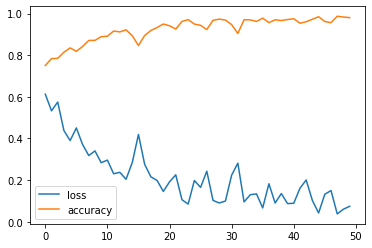

In [ ]:
loss.plot()

In [ ]:
test_dataset = tf.keras.preprocessing.image.ImageDataGenerator()
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (300,300),
    color_mode='grayscale',
    batch_size = 32,
    class_mode = 'binary',shuffle= False)

Found 2254 images belonging to 2 classes.


In [ ]:
import numpy as np
pred = []
for i in model.predict(validation_generator).reshape(1,-1)[0]:
    pred.append(np.round(i))

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(pred,validation_generator.classes))

              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      1092
         1.0       0.93      0.90      0.92      1162

    accuracy                           0.92      2254
   macro avg       0.92      0.92      0.92      2254
weighted avg       0.92      0.92      0.92      2254



In [ ]:
import seaborn as sns

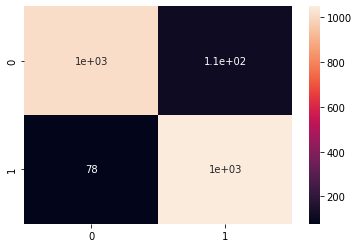

In [ ]:
sns.heatmap(confusion_matrix(validation_generator.classes,pred),annot = True)